# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Dependencies and Setup
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"




# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [26]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="



city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
index_counter = 0
set_counter = 1

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Processing Record 1 of Set 1 : prince rupert
Processing Record 2 of Set 1 : ribeira grande
Processing Record 3 of Set 1 : rikitea
Processing Record 4 of Set 1 : ravar
Processing Record 5 of Set 1 : jamestown
City not found. Skipping...
City not found. Skipping...
Processing Record 6 of Set 1 : springfield
Processing Record 7 of Set 1 : albany
Processing Record 8 of Set 1 : ushuaia
Processing Record 9 of Set 1 : port alfred
Processing Record 10 of Set 1 : egvekinot
Processing Record 11 of Set 1 : verkhnetulomskiy
Processing Record 12 of Set 1 : tuktoyaktuk
Processing Record 13 of Set 1 : dikson
Processing Record 14 of Set 1 : saint-joseph
Processing Record 15 of Set 1 : la ronge
Processing Record 16 of Set 1 : punta arenas
Processing Record 17 of Set 1 : atuona
Processing Record 18 of Set 1 : cape town
Processing Record 19 of Set 1 : castro
Processing Record 20 of Set 1 : kavieng
Processing Record 21 of Set 1 : bredasdorp
City not found. Skipping...
Processing Record 22 of Set 1 : lida


Processing Record 34 of Set 4 : shimoda
Processing Record 35 of Set 4 : pasighat
Processing Record 36 of Set 4 : westport
Processing Record 37 of Set 4 : kenai
Processing Record 38 of Set 4 : bambous virieux
Processing Record 39 of Set 4 : aksu
Processing Record 40 of Set 4 : georgetown
Processing Record 41 of Set 4 : andenes
Processing Record 42 of Set 4 : san quintin
Processing Record 43 of Set 4 : san julian
Processing Record 44 of Set 4 : puerto ayora
Processing Record 45 of Set 4 : yar-sale
Processing Record 46 of Set 4 : virginia beach
Processing Record 47 of Set 4 : baft
Processing Record 48 of Set 4 : komsomolskiy
Processing Record 49 of Set 4 : goma
City not found. Skipping...
Processing Record 50 of Set 4 : inuvik
Processing Record 0 of Set 5 : medea
City not found. Skipping...
Processing Record 1 of Set 5 : mandalgovi
Processing Record 2 of Set 5 : acarau
City not found. Skipping...
Processing Record 3 of Set 5 : strezhevoy
Processing Record 4 of Set 5 : humaita
Processing R

Processing Record 22 of Set 8 : daoukro
Processing Record 23 of Set 8 : sindor
Processing Record 24 of Set 8 : makakilo city
Processing Record 25 of Set 8 : collie
Processing Record 26 of Set 8 : scorze
Processing Record 27 of Set 8 : kidal
Processing Record 28 of Set 8 : dzaoudzi
City not found. Skipping...
Processing Record 29 of Set 8 : yugorsk
Processing Record 30 of Set 8 : buraydah
Processing Record 31 of Set 8 : sistranda
Processing Record 32 of Set 8 : simao
Processing Record 33 of Set 8 : nusaybin
City not found. Skipping...
Processing Record 34 of Set 8 : sengiley
Processing Record 35 of Set 8 : marsh harbour
Processing Record 36 of Set 8 : turayf
City not found. Skipping...
Processing Record 37 of Set 8 : hasaki
Processing Record 38 of Set 8 : santiago de compostela
Processing Record 39 of Set 8 : campbell river
Processing Record 40 of Set 8 : salinas
Processing Record 41 of Set 8 : baykit
Processing Record 42 of Set 8 : gambela
Processing Record 43 of Set 8 : leshukonskoye


Processing Record 3 of Set 12 : atasu
Processing Record 4 of Set 12 : resavica
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
weather_dict = pd.DataFrame({ 
                "City" : city_name,
                "Cloudiness" : cloudiness,
                "Country" : country,
                "Date" : date,
                "Humidity" : humidity,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : max_temp,
                "Wind Speed" : wind_speed
})

In [31]:
weatherclean_dict = {"Lat": lat, "Lng": lng, "Max Temp": max_temp, "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed, "Date": date}
weatherclean_data = pd.DataFrame(weatherclean_dict)
weatherclean_data

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,54.3161,-130.3201,8.00,93,75,2.06,1619009488
1,38.5167,-28.7000,17.00,94,75,7.72,1619009539
2,-23.1203,-134.9692,25.07,75,74,3.01,1619009539
3,31.2656,56.8055,30.31,10,40,5.23,1619009539
4,42.0970,-79.2353,-1.11,100,90,6.17,1619009540
...,...,...,...,...,...,...,...
560,20.8667,-90.4000,25.25,83,31,2.84,1619009711
561,31.2156,29.9553,21.00,56,0,7.20,1619009712
562,6.8440,80.0024,30.00,74,40,4.12,1619009712
563,48.6814,71.6433,6.69,37,7,6.17,1619009712


In [32]:
weatherclean_data.count()

Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Date          565
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [34]:
weatherclean_data.max()

Lat           7.821860e+01
Lng           1.793167e+02
Max Temp      4.129000e+01
Humidity      1.000000e+02
Cloudiness    1.000000e+02
Wind Speed    1.504000e+01
Date          1.619010e+09
dtype: float64

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

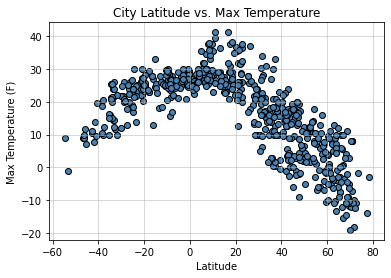

In [71]:

# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weatherclean_data["Lat"], weatherclean_data["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Latitude vs. Humidity Plot

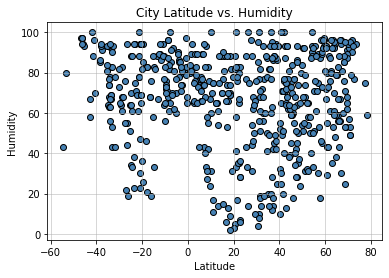

In [51]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weatherclean_data["Lat"], weatherclean_data["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Humidity")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Latitude vs. Cloudiness Plot

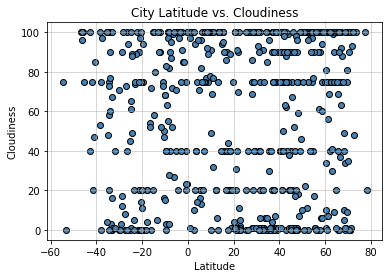

In [46]:
plt.scatter(weatherclean_data["Lat"], weatherclean_data["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Cloudiness")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Latitude vs. Wind Speed Plot

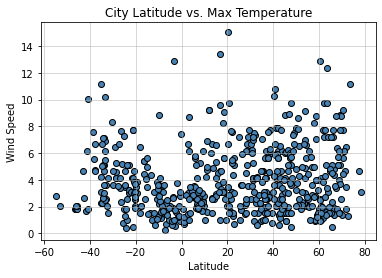

In [58]:
plt.scatter(weatherclean_data["Lat"], weatherclean_data["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)



## Linear Regression

In [55]:
northernhemisphere_df = weatherclean_data[weatherclean_data['Lat'] >= 0]
northernhemisphere_df.head()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,54.3161,-130.3201,8.00,93,75,2.06,1619009488
1,38.5167,-28.7000,17.00,94,75,7.72,1619009539
3,31.2656,56.8055,30.31,10,40,5.23,1619009539
4,42.0970,-79.2353,-1.11,100,90,6.17,1619009540
5,37.2153,-93.2982,0.56,86,90,2.57,1619009311


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.713893567277432


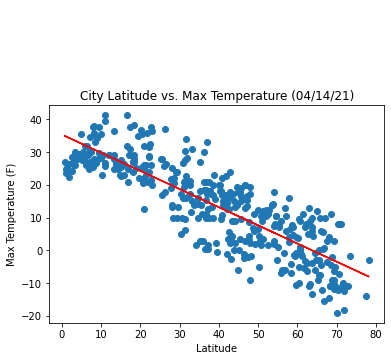

In [60]:

#Create Scatter plot for max temp vs Lat
x_values = northernhemisphere_df['Lat']
y_values = northernhemisphere_df['Max Temp']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Max Temperature (04/14/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(26,72),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [63]:
southernhemisphere_df = weatherclean_data[weatherclean_data['Lat'] < 0]
southernhemisphere_df.head()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
2,-23.1203,-134.9692,25.07,75,74,3.01,1619009539
7,-54.8000,-68.3000,9.00,43,75,2.76,1619009476
8,-33.5906,26.8910,23.96,67,100,6.14,1619009540
13,-21.3667,55.6167,26.00,78,90,7.72,1619009542
15,-53.1500,-70.9167,-1.00,80,0,2.06,1619009542


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.015724655121784385


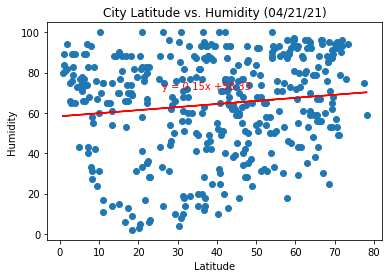

In [61]:

#Create Scatter plot for max temp vs Lat
x_values = northernhemisphere_df['Lat']
y_values = northernhemisphere_df['Humidity']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Humidity (04/21/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(26,72),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0003944299478929493


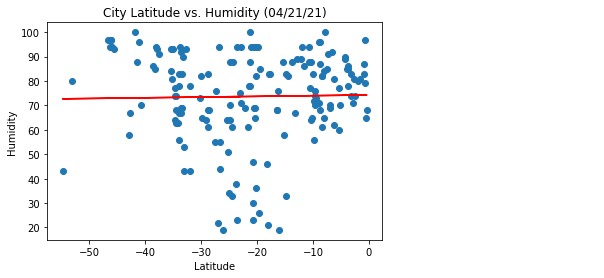

In [64]:
#Create Scatter plot for max temp vs Lat
x_values = southernhemisphere_df['Lat']
y_values = southernhemisphere_df['Humidity']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Humidity (04/21/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(26,72),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.001015024902320282


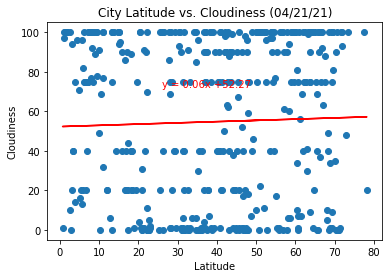

In [66]:
#Create Scatter plot for max temp vs Lat
x_values = northernhemisphere_df['Lat']
y_values = northernhemisphere_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Cloudiness (04/21/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(26,72),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.006551147996288136


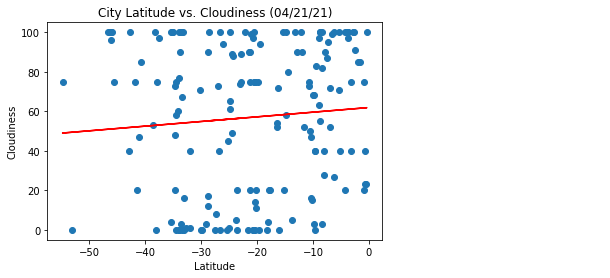

In [70]:
#Create Scatter plot for max temp vs Lat
x_values = southernhemisphere_df['Lat']
y_values = southernhemisphere_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Cloudiness (04/21/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(26,72),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.01220798444008304


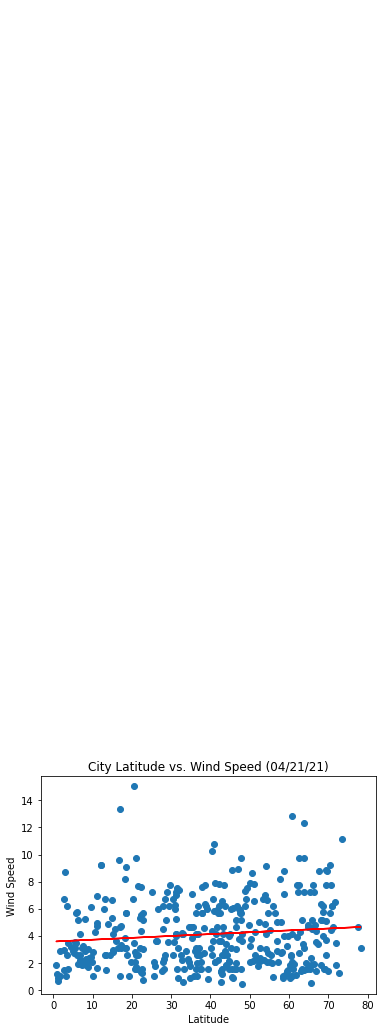

In [68]:
#Create Scatter plot for max temp vs Lat
x_values = northernhemisphere_df['Lat']
y_values = northernhemisphere_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Wind Speed (04/21/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(26,72),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.08365238204499464


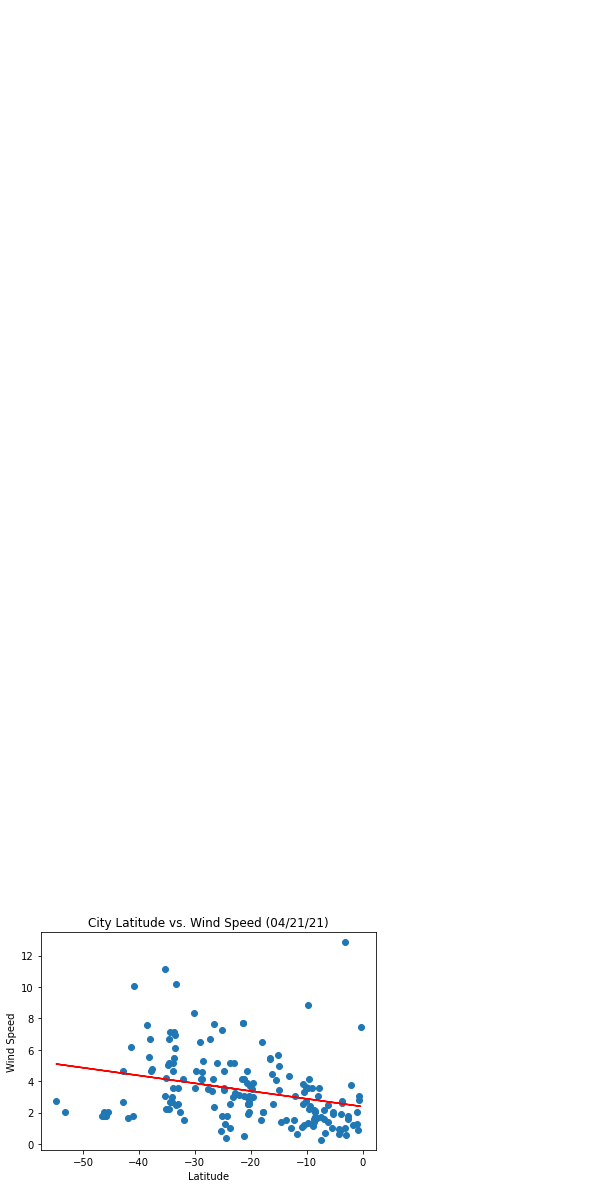

In [69]:
#Create Scatter plot for max temp vs Lat
x_values = southernhemisphere_df['Lat']
y_values = southernhemisphere_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Wind Speed (04/21/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

#Plot Linear regression
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(26,72),fontsize=10,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

#Show plot
plt.show()